In [1]:
import pandas as pd
from Preprocessor import Preprocessor
import nltk


In [2]:
url = r"C:\Users\Admin\OneDrive\Pulpit\datatweeter\all-tweets2.csv"
dataset = pd.read_csv(url)
dataset.head()

,text,created_at,conversation_id,id,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,RT @Marion50758141: https://t.co/gcx9Te2Apg #K...,2022-03-09T00:39:36.000Z,1.501357e+18,1.501357e+18,8.499951e+17,1,0,0,0
1,https://t.co/gcx9Te2Apg #KACZYŃSKI #ZAKPIŁ Z #...,2022-03-09T00:38:00.000Z,1.501357e+18,1.501357e+18,1.278628e+18,1,0,2,0
2,"@EwaWiniara To tak dla kontrastu, żeby pokazać...",2022-03-06T10:08:36.000Z,1.500409e+18,1.500413e+18,8.167278e+17,0,1,2,0
3,@USAmbPoland @SecBlinken Prośba do Pana Ambasa...,2022-03-05T13:17:10.000Z,1.500054e+18,1.500098e+18,8.167278e+17,0,0,5,0
4,@sebsol70 @OnTheEdge777 @bodekpe @JackplackI @...,2022-03-11T11:54:16.000Z,1.502240e+18,1.502252e+18,3.655612e+08,0,0,2,0


In [3]:
preprocesor = Preprocessor()

In [4]:
preprocesor.fit(dataset)

In [5]:
after = preprocesor.transform(["text"])

In [6]:
after.text.head(30)

0                                                  rt 😯
1                                                     😯
2                     kontrast pokazać debilizm doradca
3     prośba ambasador dać uwieść piękne słowo nadal...
4            dziękować sebastiana serdeczności wymienić
5     wczoraj trybunał julia przyłębskiej orzec prze...
6     kujnąć dupa wyrok oczywisty debil maja prawa u...
7     polski przyjąć 14 milion uchodźca parlament eu...
8     dziekuje tk pchać ręka twierdzić konwencja pra...
9     rt najwidoczniej wszystek pokolenie zwariować ...
10    rt 🔴 zespół zdecydować 👉 ujawniać archiwum ‼️ ...
11                                               celnie
12                                                   rt
13                                                   rt
14                                                   rt
15                                                     
16                                  znać konstytucja rp
17    myśleć czytać rozmawiać bać protestować po

In [7]:
from stop_words import get_stop_words

In [8]:
'i' in get_stop_words('polish')

False

In [9]:
"i" in open("polish_stopwords.txt", 'r',encoding = 'utf-8').read().splitlines()

True

In [10]:
all_words = []
for sentence in dataset["text"]:
    all_words.extend(sentence.split())

In [11]:
import nltk

nltk.FreqDist(all_words)

FreqDist({'rt': 6067, 'ukraina': 736, 'mieć': 618, 'polski': 556, 'rosyjski': 400, 'rosja': 328, 'chcieć': 323, 'czas': 313, 'putin': 297, 'wiedzieć': 285, ...})

In [12]:
import string
string.punctuation + "„”"

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~„”'

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  
import matplotlib.pyplot as plt

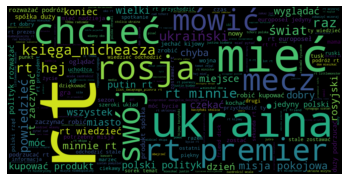

In [14]:
words = []
for message in after['text']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()